In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

In [2]:
# Importing training dataset
df = pd.read_csv("C:/Users/Yogendra/Downloads/forest_fires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#EDA

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# Check for Null values
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# Check for duplicate values
df[df.duplicated()].shape

(8, 31)

In [8]:
df = df.drop_duplicates()
df.reset_index(inplace=True,drop=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
df_cat = df.select_dtypes(include=['object'])
df_cat

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small
...,...,...,...
504,aug,sun,large
505,aug,sun,large
506,aug,sun,large
507,aug,sat,small


In [10]:
num_feat=[feature for feature in df.columns if df[feature].dtypes != 'O']

df_num = df[num_feat]
df_num

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
discrete=[feature for feature in num_feat if len(df[feature].unique())<25]
discrete

['wind',
 'rain',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep']

In [12]:
continuous=[feature for feature in num_feat if feature not in discrete]
continuous

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

In [13]:
data_cont = df_num[continuous]
data_cont

,FFMC,DMC,DC,ISI,temp,RH,area
0,86.2,26.2,94.3,5.1,8.2,51,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.00
2,90.6,43.7,686.9,6.7,14.6,33,0.00
3,91.7,33.3,77.5,9.0,8.3,97,0.00
4,89.3,51.3,102.2,9.6,11.4,99,0.00
...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,6.44
505,81.6,56.7,665.6,1.9,21.9,71,54.29
506,81.6,56.7,665.6,1.9,21.2,70,11.16
507,94.4,146.0,614.7,11.3,25.6,42,0.00


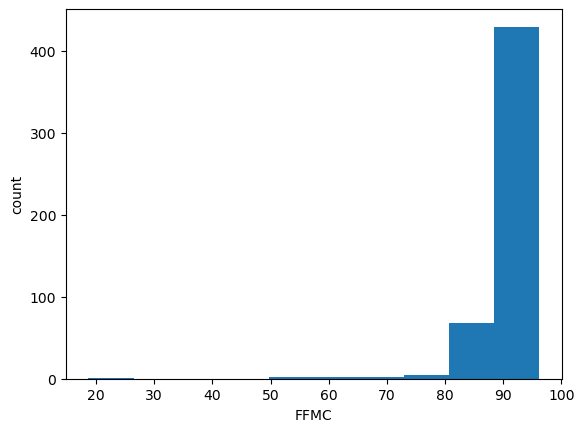

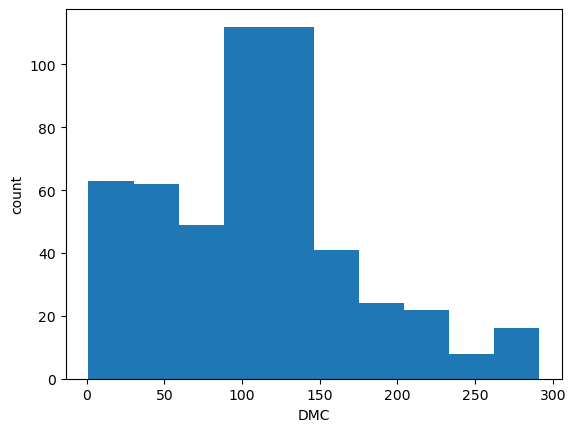

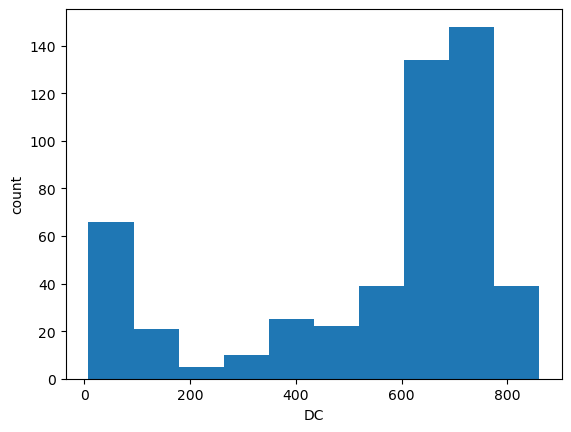

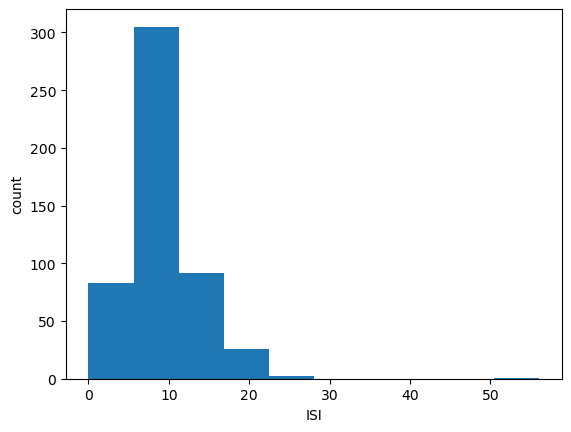

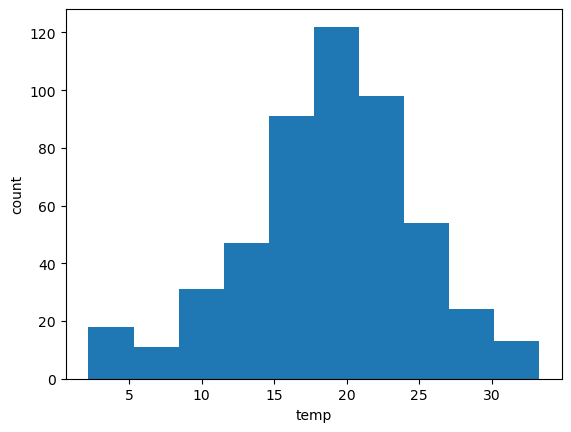

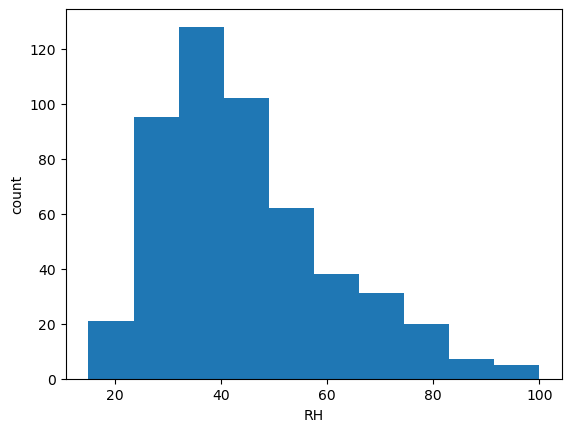

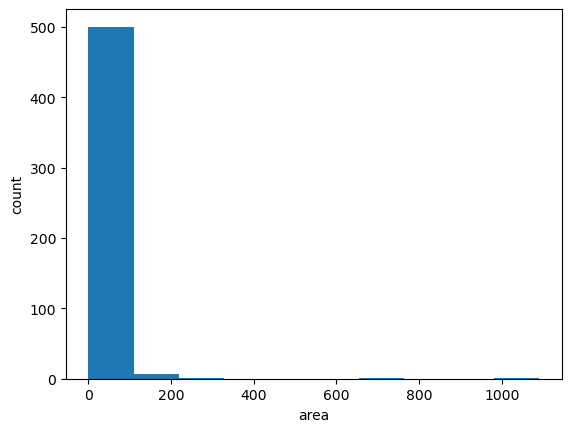

In [14]:
for feature in data_cont.columns:
    plt.figure()
    plt.hist(data_cont[feature])
    plt.xlabel(feature)
    plt.ylabel("count")

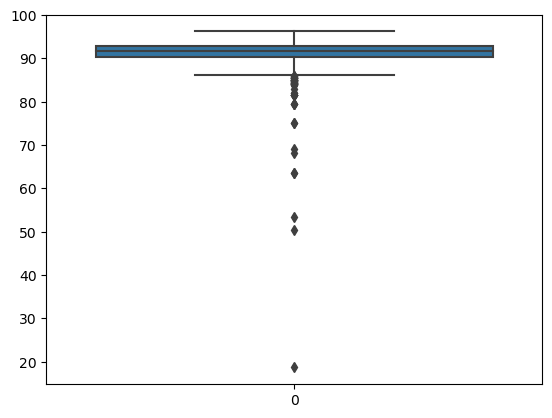

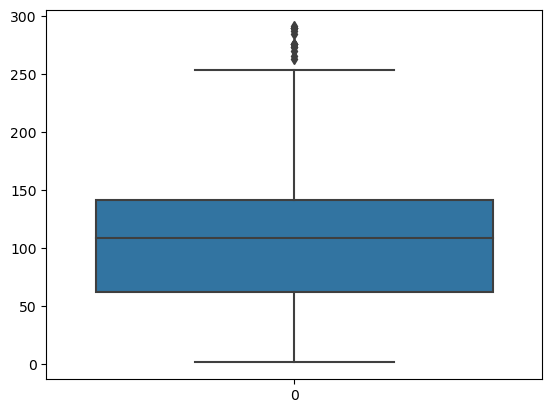

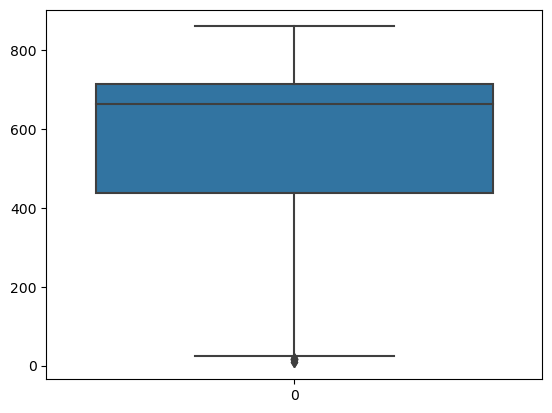

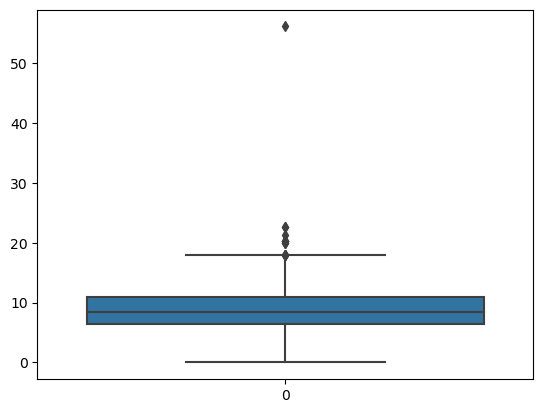

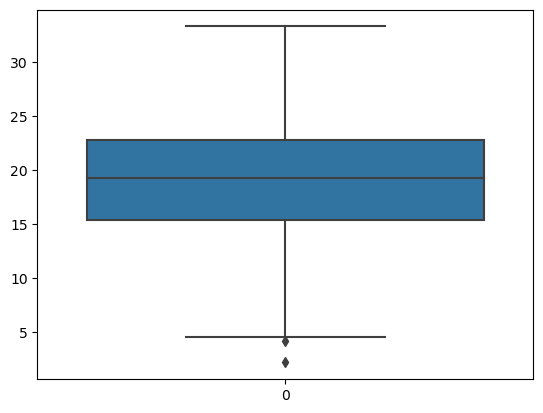

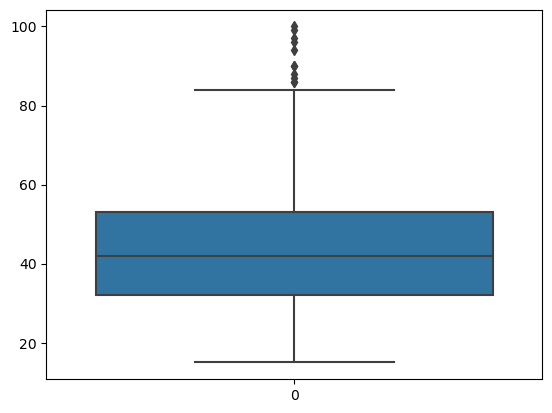

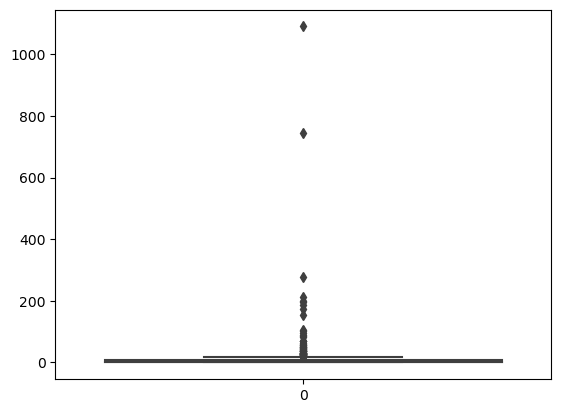

In [15]:
for feature in data_cont.columns:
    plt.figure()
    sb.boxplot(data_cont[feature])

In [16]:
# There are outliers but we need to keep them as they are very large in numbers and removing them will mean significant data loss

In [17]:
data_cont.corr()

,FFMC,DMC,DC,ISI,temp,RH,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,-0.074554
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,1.000000


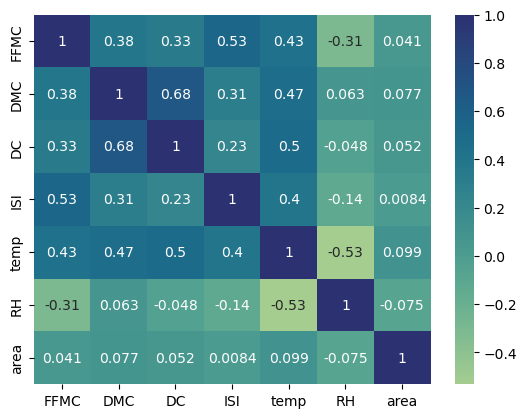

In [18]:
sb.heatmap(data_cont.corr(),cmap="crest", annot=True,)
plt.show()

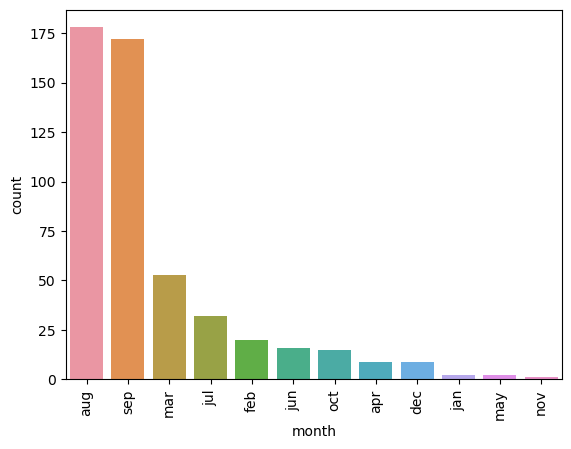

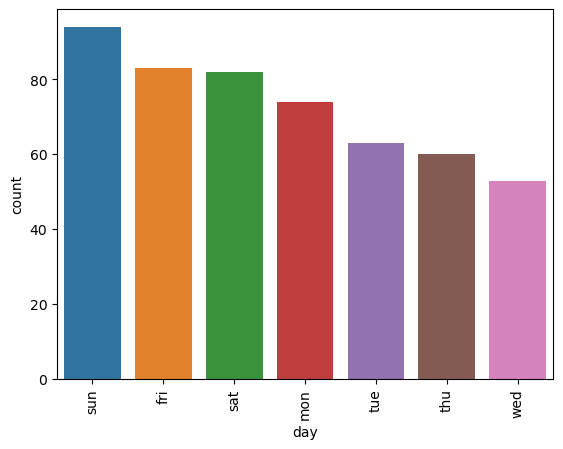

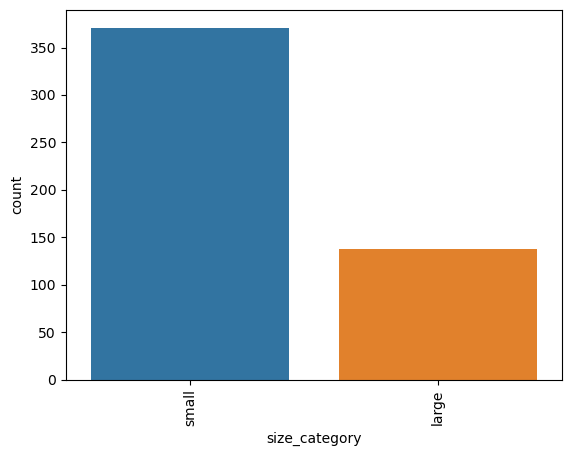

In [19]:
for feature in df_cat.columns:
    plt.figure()
    sb.countplot(x=feature, data=df_cat, 
              order=df_cat[feature].value_counts().index)
    plt.xticks(rotation = 90)
plt.show()

<Figure size 640x480 with 0 Axes>

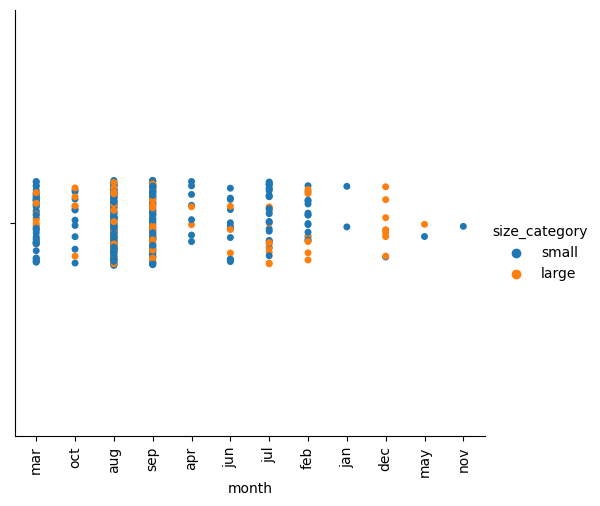

<Figure size 640x480 with 0 Axes>

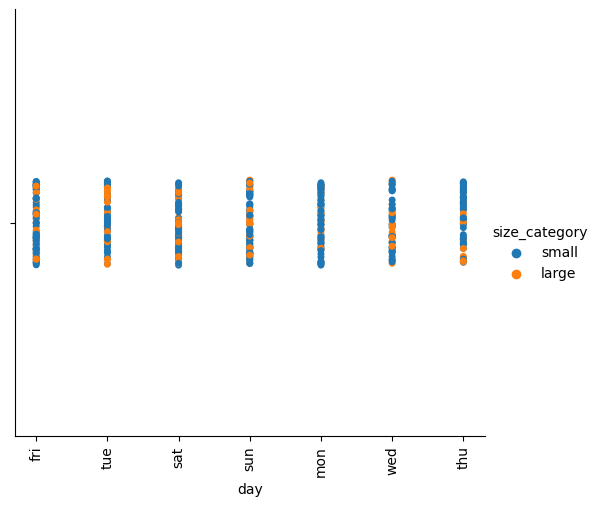

<Figure size 640x480 with 0 Axes>

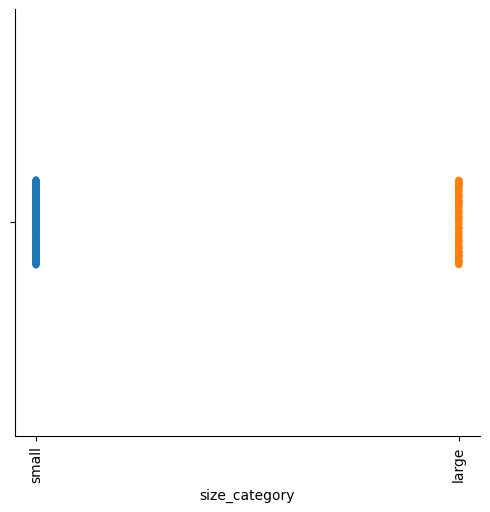

In [20]:
for feature in df_cat.columns:
    plt.figure()
    sb.catplot(data=df_cat,x=feature,hue="size_category")
    plt.xticks(rotation = 90)
plt.show()

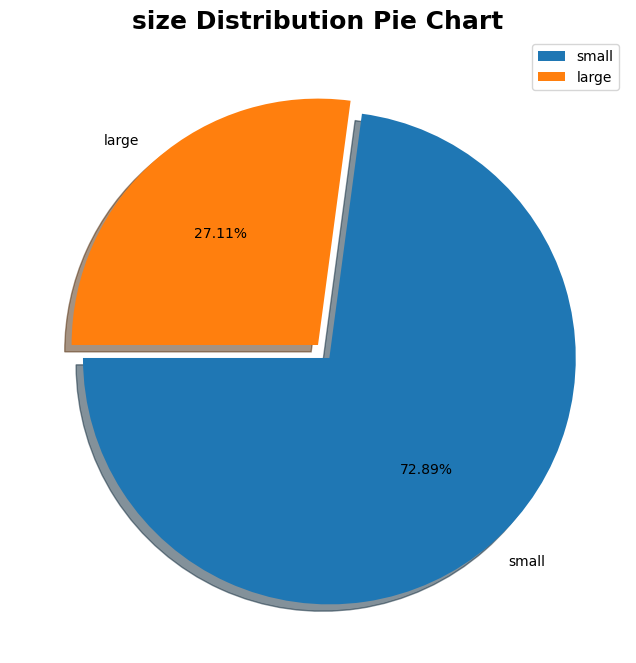

In [21]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        shadow= True,
       startangle= 180)
plt.legend(loc= 'upper right')
plt.title("size Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [22]:
#Apply Label Encoding Technique to Converting categorical variables into numerical

In [23]:
df_cat.columns

Index(['month', 'day', 'size_category'], dtype='object')

In [24]:
from sklearn import preprocessing

In [25]:
encoder=preprocessing.LabelEncoder()

In [26]:
df["month"]=encoder.fit_transform(df["month"])
df["day"]=encoder.fit_transform(df["day"])
df["size_category"]=encoder.fit_transform(df["size_category"])

In [27]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[num_feat]
df[num_feat] = scaler.fit_transform(features.values)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
1,10,5,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,1
2,10,2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,1
3,7,0,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
4,7,3,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
505,1,3,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
506,1,3,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
507,1,2,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,1


In [29]:
x = df.drop('size_category', 1)
y = df['size_category']

In [30]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,10,5,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,10,2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,7,0,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,7,3,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
505,1,3,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
506,1,3,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
507,1,2,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
504    0
505    0
506    0
507    1
508    1
Name: size_category, Length: 509, dtype: int32

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [33]:
#Build a model using Support vector machines

In [34]:
#With Linear Kernel
mod_linear = SVC(kernel = 'linear')
mod_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
y_pred_train = mod_linear.predict(x_train)
y_pred_test  = mod_linear.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.95      1.00      0.97        77

    accuracy                           0.96       102
   macro avg       0.98      0.92      0.94       102
weighted avg       0.96      0.96      0.96       102



Accuracy for Train data = 0.88698
Accuracy for Test data = 0.96078


Text(50.722222222222214, 0.5, 'Actual')

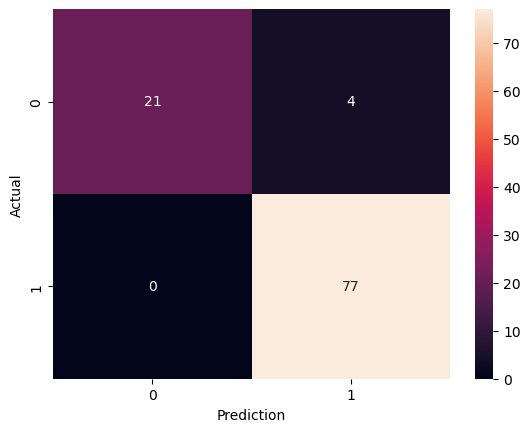

In [37]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [38]:
#with polynomial kernal

In [39]:
#With Linear Kernel
mod_poly = SVC(kernel = 'poly')
mod_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [40]:
y_pred_train = mod_poly.predict(x_train)
y_pred_test  = mod_poly.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.80      1.00      0.89        77

    accuracy                           0.81       102
   macro avg       0.90      0.62      0.64       102
weighted avg       0.85      0.81      0.77       102



Accuracy for Train data = 0.76167
Accuracy for Test data = 0.81373


Text(50.722222222222214, 0.5, 'Actual')

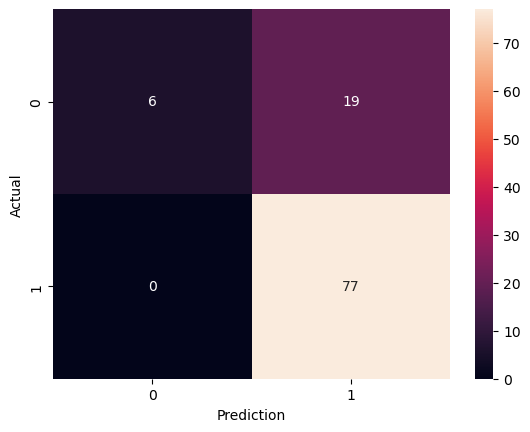

In [42]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [43]:
#with RBF kernal
model_rbf = SVC(kernel='rbf', C=1, gamma = 0.02)
model_rbf.fit(x_train,y_train)

SVC(C=1, gamma=0.02)

In [44]:
y_pred_train = model_rbf.predict(x_train)
y_pred_test  = model_rbf.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.79      1.00      0.89        77

    accuracy                           0.80       102
   macro avg       0.90      0.60      0.61       102
weighted avg       0.84      0.80      0.75       102



Accuracy for Train data = 0.76413
Accuracy for Test data = 0.80392


Text(50.722222222222214, 0.5, 'Actual')

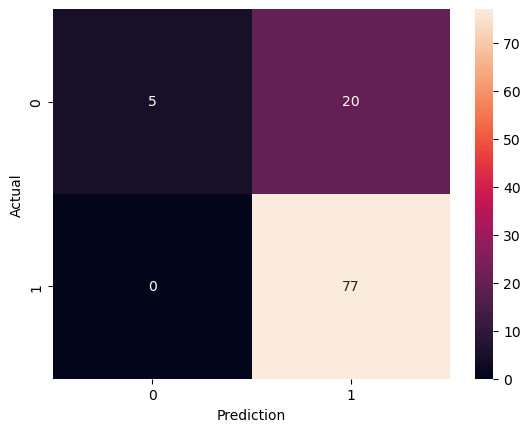

In [46]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [47]:
#with sigmoidal kernal
mod_sk = SVC(kernel='sigmoid')
mod_sk.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [48]:
y_pred_train = mod_sk.predict(x_train)
y_pred_test  = mod_sk.predict(x_test)

In [49]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.28      0.38        25
           1       0.80      0.94      0.86        77

    accuracy                           0.77       102
   macro avg       0.69      0.61      0.62       102
weighted avg       0.75      0.77      0.74       102



Accuracy for Train data = 0.71499
Accuracy for Test data = 0.77451


Text(50.722222222222214, 0.5, 'Actual')

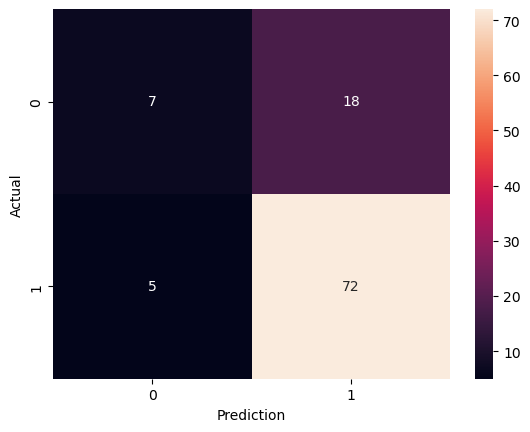

In [50]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [51]:
#Model using Linear Kernel gave the highest accuracy. Hence select this model.